In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import bempp.api
from bempp.api import shapes
import bempp_cavity

# Define Mesh

In [3]:
ELEMENT_SIZE = 0.5
LENGTH_CAVITY = 1
LENGTH_WALL = 3

In [4]:
inner_walls = [
    shapes.cube(
        length=1, h=ELEMENT_SIZE,
        origin=(-1.25, -1/2, -1.25)
    ),
    shapes.cube(
        length=1, h=ELEMENT_SIZE,
        origin=(0.25, -1/2, -1.25)
    ),
    shapes.cube(
        length=1, h=ELEMENT_SIZE,
        origin=(-1.25, -1/2, 0.25)
    ),
    shapes.cube(
        length=1, h=ELEMENT_SIZE,
        origin=(0.25, -1/2, 0.25)
    ),
    
]
outer_wall = shapes.cube(
        length=LENGTH_WALL, h=ELEMENT_SIZE,
        origin=(-LENGTH_WALL/2, -LENGTH_WALL/2, -LENGTH_WALL/2)
)
grid = bempp_cavity.create_grid(outer_wall, *inner_walls)

# Define Parameters and incident wave

In [5]:
Ks = [1, 1, 1, 1, 1, 1]
MUs = [1, 1, 1, 1, 1, 1]
wave = bempp_cavity.IncidentWave(Ks[0], MUs[0])

1 1


# Create Models

In [10]:
model_sf = bempp_cavity.Model(grid, Ks, MUs, wave)

In [6]:
model_wf = bempp_cavity.Model(grid, Ks, MUs, wave, spaces='RWG-dominant')

# Solve Them

In [7]:
methods = [
    'none', 
#     'diagonal',
#     'self',
]

In [13]:
model_sf = bempp_cavity.Model(grid, Ks, MUs, wave)
sol_sf = {
    method: model_sf.solve(preconditioner=method)
    for method in methods
}

1 2 126 126
3 2 126 126
0 0 126 126
3 0 126 126
0 4 810 126
1 4 810 126
1 3 126 126
2 3 126 126
2 1 126 126
2 4 810 126
4 2 126 810
1 0 126 126
0 3 126 126
4 0 126 810
0 1 126 126
3 3 126 126
4 1 126 810
3 1 126 126
4 4 810 810
0 2 126 126
2 0 126 126
4 3 126 810
2 2 126 126
3 4 810 126
1 1 126 126


In [8]:
model_wf = bempp_cavity.Model(grid, Ks, MUs, wave, spaces='RWG-dominant')
sol_wf = {
    method: model_wf.solve(preconditioner=method)
    for method in methods
}

1 2 126 126
3 2 126 126
0 0 126 126
3 0 126 126
0 4 810 126
1 4 810 126
1 3 126 126
2 3 126 126
2 1 126 126
2 4 810 126
4 2 126 810
1 0 126 126
0 3 126 126
4 0 126 810
0 1 126 126
3 3 126 126
4 1 126 810
3 1 126 126
4 4 810 810
0 2 126 126
2 0 126 126
4 3 126 810
2 2 126 126
3 4 810 126
1 1 126 126


# Analyse Results

## Convergence

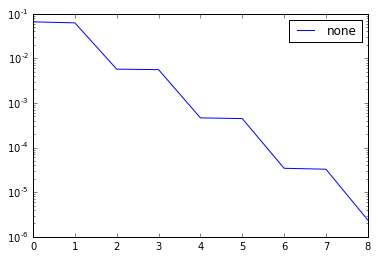

In [15]:
for method in methods:
    plt.semilogy(sol_sf[method].residuals, label=method)
plt.legend()
plt.show();

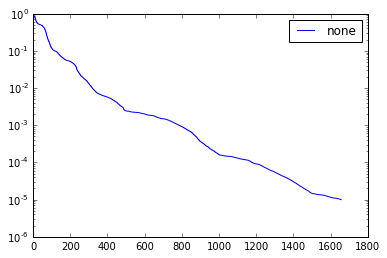

In [9]:
for method in methods:
    plt.semilogy(sol_wf[method].residuals, label=method)
plt.legend()
plt.gcf().savefig('residuals.png')
plt.show();

## Runtime

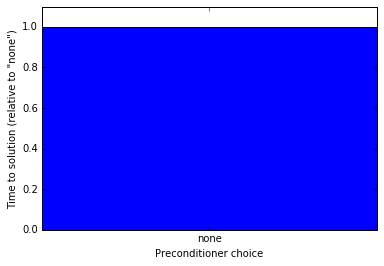

In [17]:
#
# Plot bar chart of run times
#
sol = sol_sf
ref = sol['none'].info['time_solve']
x = [i for i, _ in enumerate(methods)]
times = [sol[method].info['time_solve']/ref for method in methods]
xlabels = methods

fig, ax = plt.subplots(1, 1)
plt.setp(ax, xticks=x, xticklabels=xlabels)


ax.bar(x, times, align='center');
ax.set_ylim([0, 1.1])
ax.set_xlabel('Preconditioner choice')
ax.set_ylabel('Time to solution (relative to "none")')

In [26]:
# Average time per matvec
for m in methods:
    print(m, sol[m].info['time_solve']/sol[m].info['matvec_count'])

none 0.023014561111110905


# Memory Requirement

In [28]:
#
# Plot bar chart of run times
#
# ref = sol['none'].get_total_memory_size()
# x = [i for i, _ in enumerate(methods)]
# times = [sol[method].get_total_memory_size()/ref for method in methods]
# xlabels = methods

# fig, ax = plt.subplots(1, 1)
# plt.setp(ax, xticks=x, xticklabels=xlabels)


# ax.bar(x, times, align='center');
# ax.set_ylim([0, 1.1])
# ax.set_xlabel('Preconditioner choice')
# ax.set_ylabel('Memory')

# Sanity Check

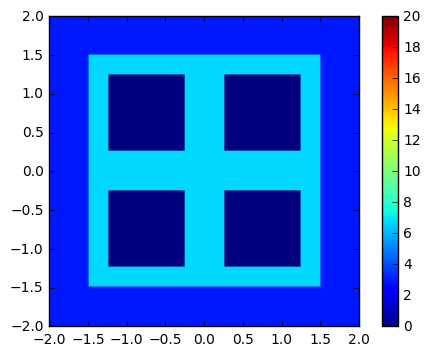

In [15]:
sol_sf.show_domains()

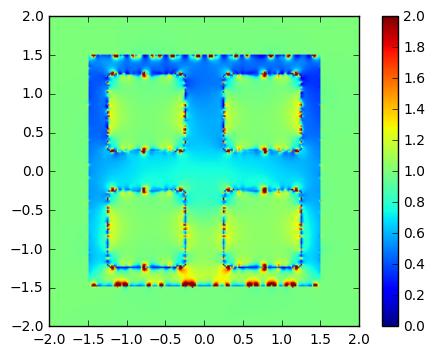

In [83]:
sol_sf['none'].plot()

In [76]:
1188 - 126*3

810

In [77]:
810*2 + 126*4*2

2628

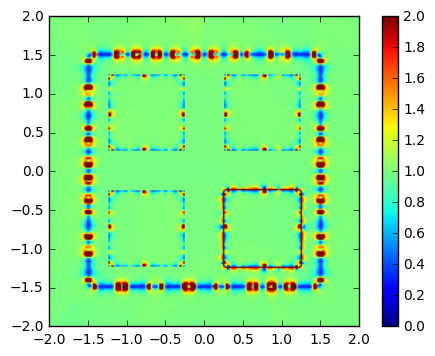

In [11]:
sol_wf['none'].plot()

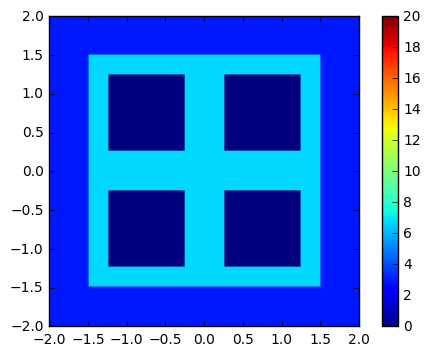

In [63]:
sol_wf['none'].show_domains()

In [65]:
sol_wf['none']._traces is None

True